In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(transform_output='pandas')


In [2]:
df = pd.read_csv('Data/adult.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [4]:
df['workclass'] = df['workclass'].replace('?','unknown')
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
unknown              2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [5]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [6]:
df['occupation'] = df['occupation'].replace('?','unknown')
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
unknown              2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [7]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [8]:
# list of cols to drop

X = df.drop(columns = ['income'])
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
27859,41,unknown,27187,Assoc-voc,11,Married-civ-spouse,unknown,Husband,White,Male,0,2415,12,United-States
5654,39,Private,319052,Bachelors,13,Married-civ-spouse,Handlers-cleaners,Wife,Asian-Pac-Islander,Female,0,0,37,Philippines
3779,34,Private,260560,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
10522,56,Self-emp-not-inc,368797,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States
22461,71,Self-emp-not-inc,163293,Prof-school,15,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,2,United-States


<Axes: >

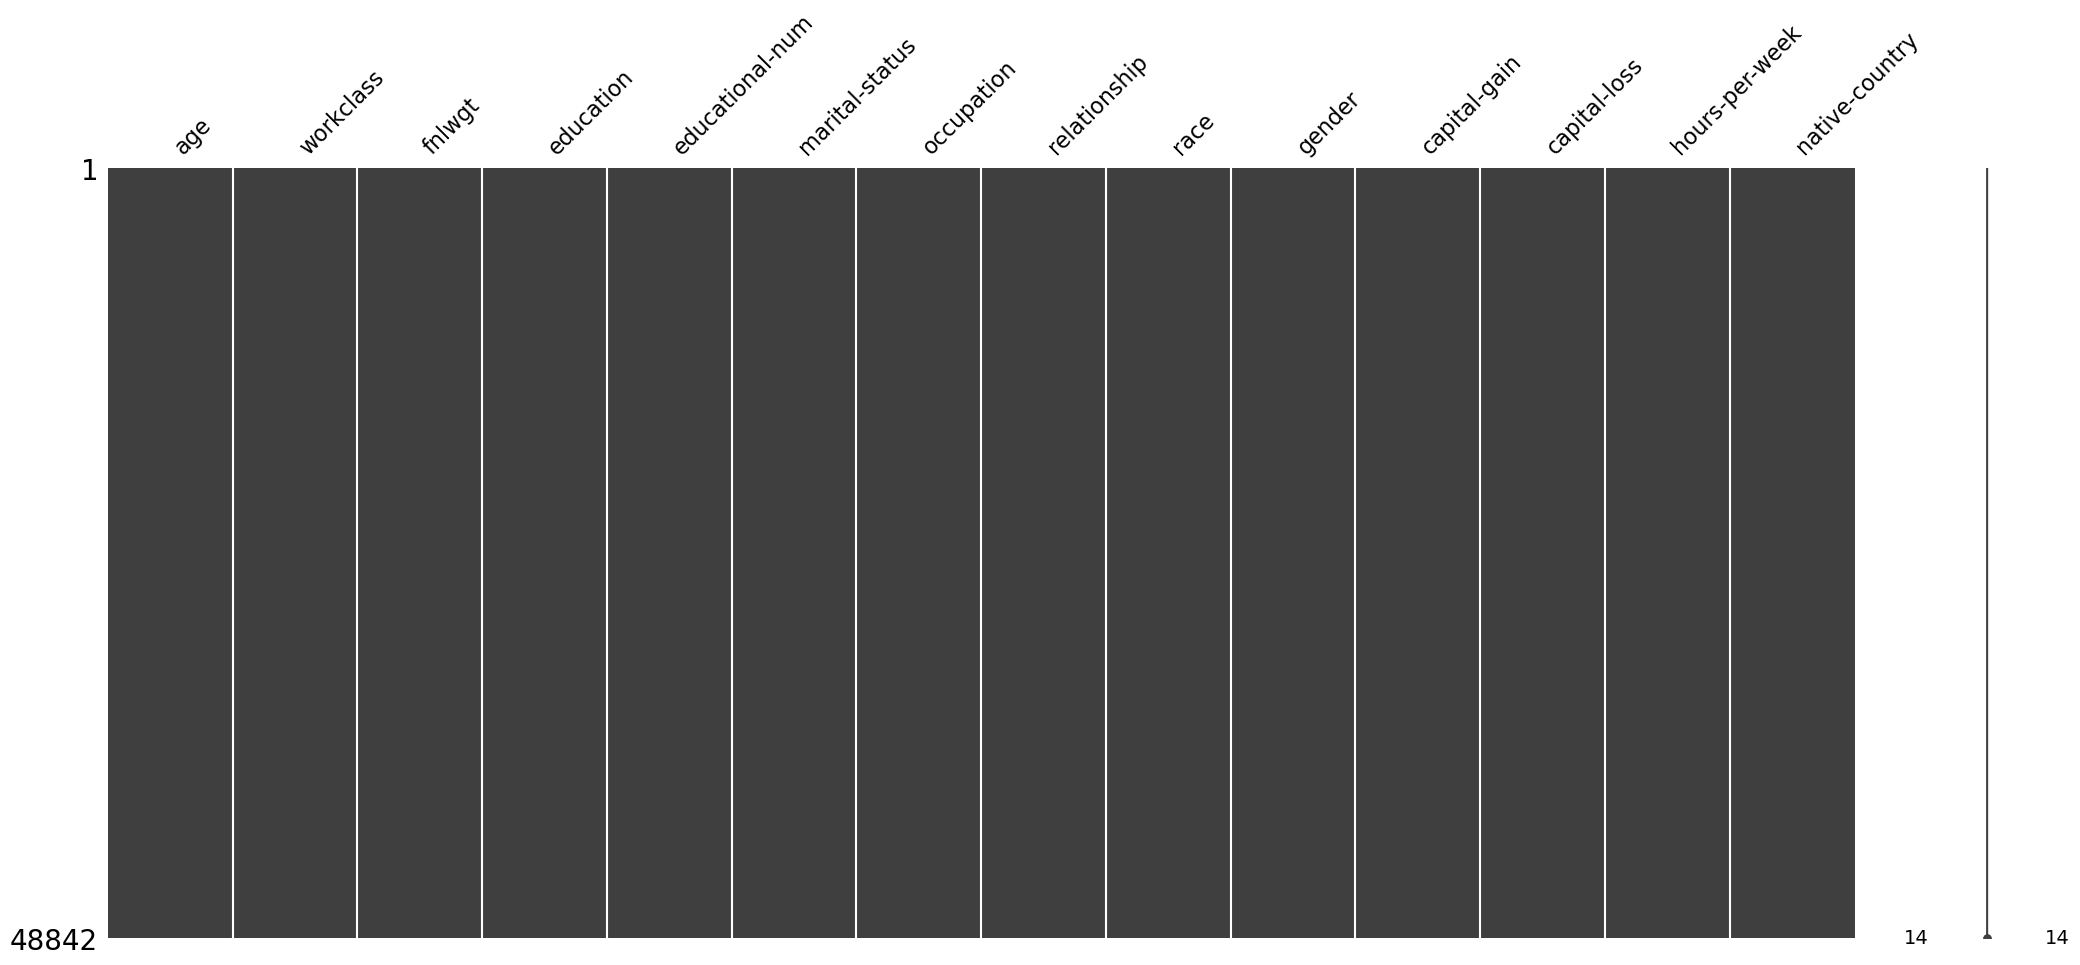

In [9]:
import missingno as msno
msno.matrix(X)

In [10]:
# Categorical Preprocessing Pipeline
# Save list of column names
ohe_cols = X_train.select_dtypes('object').columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "Missing")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
# Numerical Preprocessing Pipeline
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
# Create the Column Transformer
preprocessor = ColumnTransformer([num_tuple, ohe_tuple],
                                 verbose_feature_names_out=False)



OneHotEncoder Columns: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')
Numeric Columns: Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


In [11]:
# fit the preprocessor on X_train
preprocessor.fit(X_train)
# Transform X_train and X_test
X_train_tf = preprocessor.transform(X_train)
X_test_tf = preprocessor.transform(X_test)
X_train_tf.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
27859,0.171771,-1.538807,0.358689,-0.144508,5.711885,-2.288453,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5654,0.026057,1.225138,1.136866,-0.144508,-0.220251,-0.276184,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3779,-0.338227,0.671222,1.136866,-0.144508,-0.220251,0.770196,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10522,1.264622,1.696220,1.525955,-0.144508,-0.220251,-0.034711,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22461,2.357474,-0.249891,1.915044,-0.144508,-0.220251,-3.093361,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_X_train = scaler.fit_transform(X_train_tf)
scaled_X_test = scaler.transform(X_test_tf)

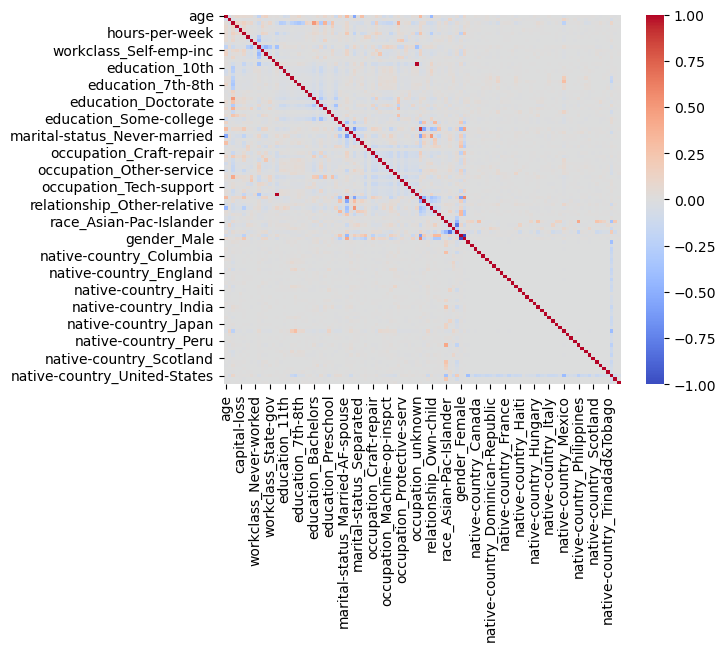

In [13]:
# Calculating the correlation matrix and plotting
corr = scaled_X_train.corr()
sns.heatmap(corr, cmap='coolwarm');

In [14]:
from sklearn.neighbors import KNeighborsClassifier
# Instantiate default KNN
knn = KNeighborsClassifier()

In [15]:
# Custom Functions
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOT
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray',colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap,colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  fig.tight_layout()
  plt.show()
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

In [16]:
# Define KNN model pipeline
knn_pipe = make_pipeline(preprocessor, knn)
# Fit the model on the training data
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.91      0.94      0.92     27801
        >50K       0.78      0.70      0.74      8830

    accuracy                           0.88     36631
   macro avg       0.85      0.82      0.83     36631
weighted avg       0.88      0.88      0.88     36631



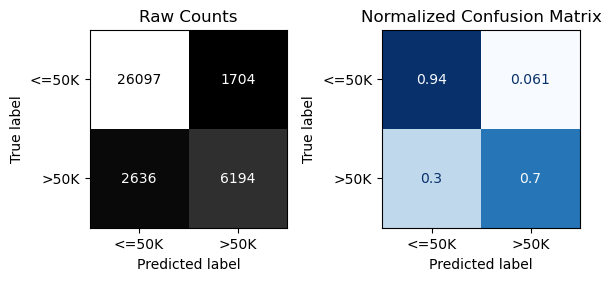


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.88      0.91      0.90      9354
        >50K       0.67      0.61      0.64      2857

    accuracy                           0.84     12211
   macro avg       0.78      0.76      0.77     12211
weighted avg       0.83      0.84      0.84     12211



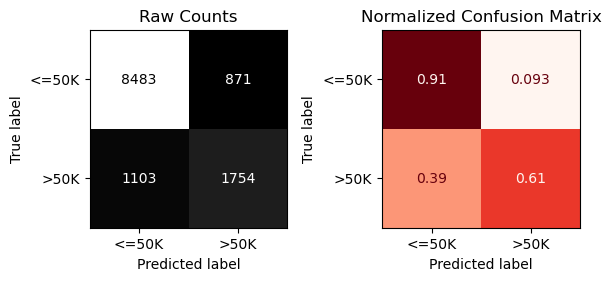

In [17]:
# Obtain evaluation metrics using custom function
evaluate_classification(knn_pipe, X_train, y_train, X_test, y_test)

In [18]:
from sklearn.inspection import permutation_importance
# Permutation importance takes a fit model and the test data.
r = permutation_importance(knn_pipe, X_test, y_test, n_repeats =5, random_state = 42)
r.keys()



dict_keys(['importances_mean', 'importances_std', 'importances'])

In [19]:
## can make the mean importances into a series
permutation_importances = pd.Series(r['importances_mean'],index=X_test.columns,
                           name = 'permutation importance')
permutation_importances = permutation_importances.sort_values(ascending=False)
permutation_importances



educational-num    0.018295
marital-status     0.017722
capital-gain       0.017443
relationship       0.012284
occupation         0.011694
age                0.007895
capital-loss       0.006715
hours-per-week     0.005077
workclass          0.003308
gender             0.003112
education          0.002277
fnlwgt             0.001147
race               0.000753
native-country    -0.001130
Name: permutation importance, dtype: float64

In [20]:
# Plot importance custom function
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax



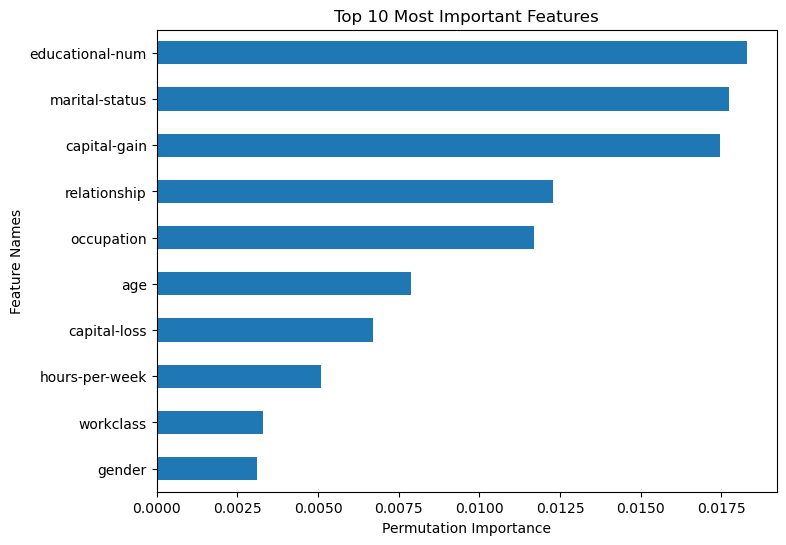

In [21]:
ax = plot_importance(permutation_importances,top_n=10)
ax.set(xlabel='Permutation Importance');


# Observations of features
- The top 10 features make sense in calculating income results of adults
- These features do realistically seem to contribute to applicable real life variables that afffect income

# Visualizations for features

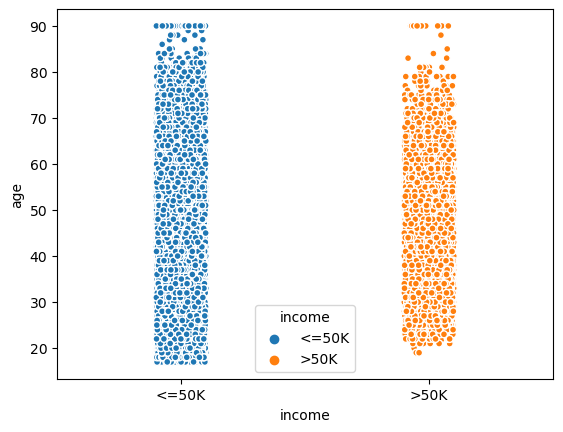

In [22]:
# Make a multivariate stripplot with 'income' and 'age'
ax = sns.stripplot(data=df, x='income', y='age',
                   hue='income', edgecolor='white', linewidth=1)

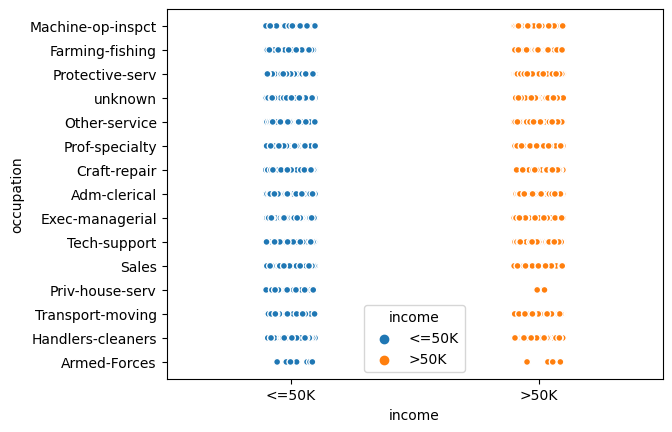

In [23]:
# Make a multivariate stripplot with 'income' and 'occupation'
ax = sns.stripplot(data=df, x='income', y='occupation',
                   hue='income', edgecolor='white', linewidth=1)

# Summary
- There are more adults that make less than or equal to 50k salaries than adults that make greater than 50k salaries
- There are more Adults age 80 and above that make less than or equal to 50k salaries. There are far less adults age 80 and above making greater than 50k salaries.
- The highest average Adults making less than or equal to 50k salaries are in Sales.
- Exec-managerial, transport-moving and sales have greater amounts of Adults making greater than 50k salaries. 

# Part 2 PCA's and Visualizations

# Pipelines

In [31]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

from sklearn import set_config
set_config(transform_output='pandas')
pd.set_option('display.max_columns',100)

In [26]:
# Categorical Preprocessing Pipeline
# Save list of column names
ohe_cols = X_train.select_dtypes('object').columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "Missing")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
# Numerical Preprocessing Pipeline
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
# Create the Column Transformer
preprocessor = ColumnTransformer([num_tuple, ohe_tuple],
                                 verbose_feature_names_out=False)



OneHotEncoder Columns: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')
Numeric Columns: Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


In [28]:
# fit the column transformer on X_train
preprocessor.fit(X_train)
# Transform X_train and X_test
X_train_tf = preprocessor.transform(X_train)
X_test_tf = preprocessor.transform(X_test)
X_train_tf.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
27859,0.171771,-1.538807,0.358689,-0.144508,5.711885,-2.288453,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5654,0.026057,1.225138,1.136866,-0.144508,-0.220251,-0.276184,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3779,-0.338227,0.671222,1.136866,-0.144508,-0.220251,0.770196,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10522,1.264622,1.696220,1.525955,-0.144508,-0.220251,-0.034711,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22461,2.357474,-0.249891,1.915044,-0.144508,-0.220251,-3.093361,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_X_train = scaler.fit_transform(X_train_tf)
scaled_X_test = scaler.transform(X_test_tf)

In [32]:
# Instantiate PCA to make 3 principal components
pca = PCA(n_components=3)
# Create and define the principal components
PCA_X_train = pca.fit_transform(scaled_X_train)
PCA_X_test = pca.transform(scaled_X_test)
# Preview the results
PCA_X_train.head()

,pca0,pca1,pca2
27859,1.536553,-0.202758,-0.437923
5654,-0.913822,-0.697130,7.861160
3779,2.533444,-0.933663,-0.398855
10522,3.105573,-1.471054,-0.097037
22461,3.403566,-1.262018,0.159177


In [33]:
PCA_X_test.head()

,pca0,pca1,pca2
7762,-2.233174,-0.414503,-0.140463
23881,-0.033443,2.557074,0.904116
30507,-1.209595,-3.423998,-0.047910
28911,2.005409,1.726540,-0.895756
19484,-0.362868,-1.955371,0.018259


In [34]:
pca.explained_variance_ratio_.sum()

0.09412233133866746

In [35]:
# combine X and y for test data
combined_test = pd.concat([PCA_X_test, y_test], axis = 1)
combined_test.head()

,pca0,pca1,pca2,income
7762,-2.233174,-0.414503,-0.140463,<=50K
23881,-0.033443,2.557074,0.904116,<=50K
30507,-1.209595,-3.423998,-0.047910,>50K
28911,2.005409,1.726540,-0.895756,<=50K
19484,-0.362868,-1.955371,0.018259,<=50K


In [36]:
# Combine X and y for train data
combined_train = pd.concat([PCA_X_train, y_train], axis = 1)
combined_train.head()

,pca0,pca1,pca2,income
27859,1.536553,-0.202758,-0.437923,>50K
5654,-0.913822,-0.697130,7.861160,<=50K
3779,2.533444,-0.933663,-0.398855,>50K
10522,3.105573,-1.471054,-0.097037,>50K
22461,3.403566,-1.262018,0.159177,<=50K


In [37]:
# Combine train and test for complete eda dataset
pca_eda = pd.concat([combined_test, combined_train], axis = 0)
pca_eda

,pca0,pca1,pca2,income
7762,-2.233174,-0.414503,-0.140463,<=50K
23881,-0.033443,2.557074,0.904116,<=50K
30507,-1.209595,-3.423998,-0.047910,>50K
28911,2.005409,1.726540,-0.895756,<=50K
19484,-0.362868,-1.955371,0.018259,<=50K
...,...,...,...,...
11284,-1.761169,1.526512,1.705171,<=50K
44732,2.142422,1.051460,-0.948308,<=50K
38158,-1.952025,-1.476549,-0.785473,<=50K
860,-2.717348,-2.088336,2.031851,<=50K


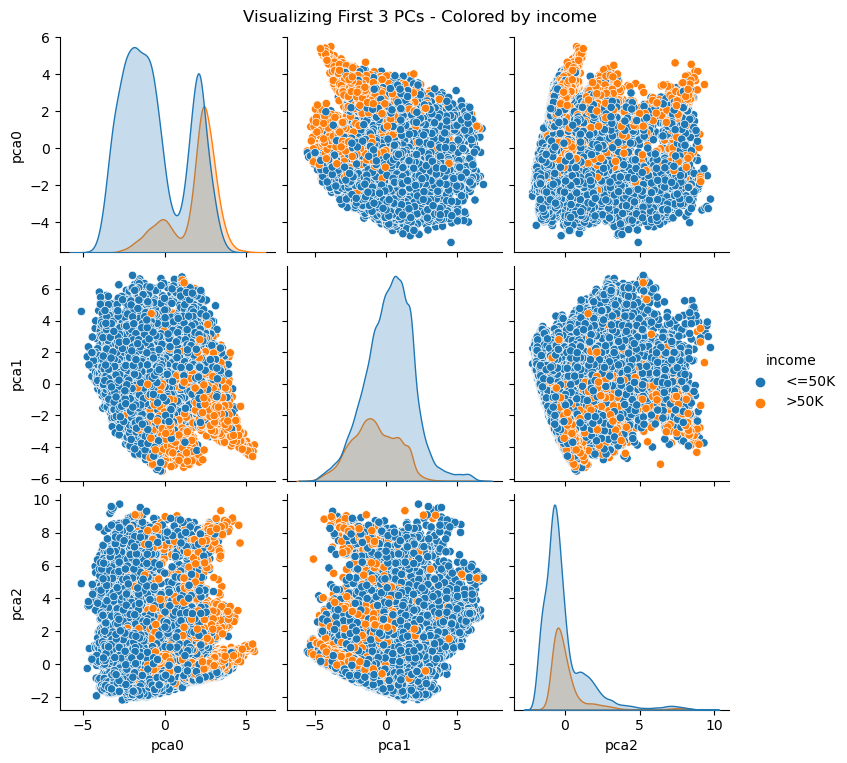

In [39]:
# Plot with color coding based on target
g_pca = sns.pairplot(data=pca_eda,  vars=PCA_X_train.columns, hue='income')
g_pca.fig.suptitle('Visualizing First 3 PCs - Colored by income', y=1.01);

# K Clusters

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [73]:
x_scaled = StandardScaler().fit_transform(scaled_X_train)
x_scaled


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,workclass_unknown,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male,native-country_?,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
27859,0.171771,-1.538807,0.358689,-0.144508,5.711885,-2.288453,-0.173629,-0.262239,-0.015677,-1.506569,-0.191207,-0.291288,-0.205048,-0.021548,4.041784,-0.170348,-0.196962,-0.116318,-0.071439,-0.103871,-0.140186,-0.124373,-0.183717,4.781615,-0.442319,-0.110894,-0.690908,-0.240570,-0.041507,-0.131965,-0.537045,-0.395971,-0.028148,1.081704,-0.114863,-0.697731,-0.179060,-0.179871,-0.360304,-0.018102,-0.377923,-0.377876,-0.175373,-0.209561,-0.257209,-0.336152,-0.072778,-0.379714,-0.145166,-0.357299,...,-0.222910,-0.099626,-0.180436,-0.321987,-0.091023,0.409340,-0.704141,0.704141,-0.132179,-0.026651,-0.06127,-0.052582,-0.039478,-0.051527,-0.044992,-0.029569,-0.056848,-0.048227,-0.029569,-0.063908,-0.033474,-0.042807,-0.039823,-0.005225,-0.018842,-0.024514,-0.019553,-0.054881,-0.035459,-0.026651,-0.047076,-0.04649,-0.041836,-0.022781,-0.140893,-0.034282,-0.021548,-0.030926,-0.080182,-0.043756,-0.037704,-0.061718,-0.020904,-0.047655,-0.035459,-0.026651,-0.021548,0.337709,-0.042162,-0.020904
5654,0.026057,1.225138,1.136866,-0.144508,-0.220251,-0.276184,-0.173629,-0.262239,-0.015677,0.663760,-0.191207,-0.291288,-0.205048,-0.021548,-0.247416,-0.170348,-0.196962,-0.116318,-0.071439,-0.103871,-0.140186,-0.124373,-0.183717,-0.209134,2.260814,-0.110894,-0.690908,-0.240570,-0.041507,-0.131965,-0.537045,-0.395971,-0.028148,1.081704,-0.114863,-0.697731,-0.179060,-0.179871,-0.360304,-0.018102,-0.377923,-0.377876,-0.175373,4.771889,-0.257209,-0.336152,-0.072778,-0.379714,-0.145166,-0.357299,...,4.486106,-0.099626,5.542125,-0.321987,-0.091023,-2.442958,1.420170,-1.420170,-0.132179,-0.026651,-0.06127,-0.052582,-0.039478,-0.051527,-0.044992,-0.029569,-0.056848,-0.048227,-0.029569,-0.063908,-0.033474,-0.042807,-0.039823,-0.005225,-0.018842,-0.024514,-0.019553,-0.054881,-0.035459,-0.026651

C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


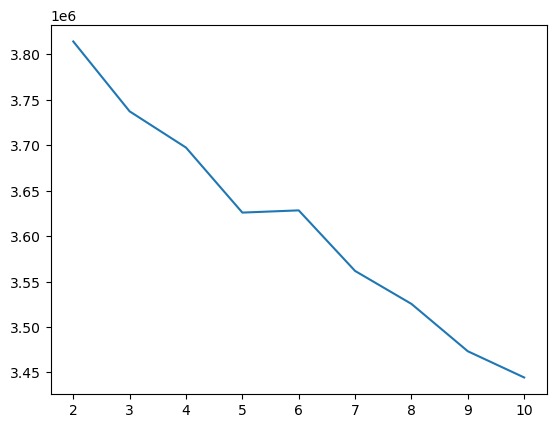

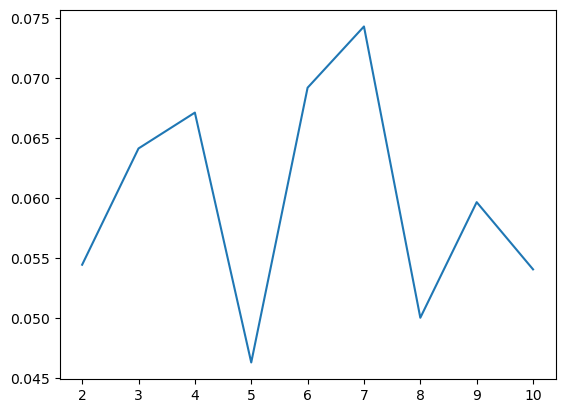

In [74]:
ks = range(2, 11)

inertias = []
sils = []

for k in ks:
  model = KMeans(n_clusters=k)
  model.fit(x_scaled)
  inertias.append(model.inertia_)
  sils.append(silhouette_score(x_scaled, model.labels_))

plt.plot(ks, inertias)

plt.show()

plt.plot(ks, sils)

In [57]:
kmeans_model = KMeans(n_clusters=7)

kmeans_model.fit(x_scaled)


C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [83]:
# Categorical Preprocessing Pipeline
# Save list of column names
ohe_cols = scaled_X_train.select_dtypes('object').columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "Missing")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
# Numerical Preprocessing Pipeline
# Save list of column names
num_cols = scaled_X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
# Create the Column Transformer
preprocessor = ColumnTransformer([num_tuple, ohe_tuple],
                                 verbose_feature_names_out=False)


OneHotEncoder Columns: Index([], dtype='object')
Numeric Columns: Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=108)


In [84]:
# fit the preprocessor on X_train
preprocessor.fit(scaled_X_train)
# Transform X_train and X_test
X_train_tf = preprocessor.transform(scaled_X_train)
X_test_tf = preprocessor.transform(scaled_X_test)
X_train_tf.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,workclass_unknown,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male,native-country_?,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
27859,0.171771,-1.538807,0.358689,-0.144508,5.711885,-2.288453,-0.173629,-0.262239,-0.015677,-1.506569,-0.191207,-0.291288,-0.205048,-0.021548,4.041784,-0.170348,-0.196962,-0.116318,-0.071439,-0.103871,-0.140186,-0.124373,-0.183717,4.781615,-0.442319,-0.110894,-0.690908,-0.240570,-0.041507,-0.131965,-0.537045,-0.395971,-0.028148,1.081704,-0.114863,-0.697731,-0.17906,-0.179871,-0.360304,-0.018102,-0.377923,-0.377876,-0.175373,-0.209561,-0.257209,-0.336152,-0.072778,-0.379714,-0.145166,-0.357299,...,-0.222910,-0.099626,-0.180436,-0.321987,-0.091023,0.409340,-0.704141,0.704141,-0.132179,-0.026651,-0.06127,-0.052582,-0.039478,-0.051527,-0.044992,-0.029569,-0.056848,-0.048227,-0.029569,-0.063908,-0.033474,-0.042807,-0.039823,-0.005225,-0.018842,-0.024514,-0.019553,-0.054881,-0.035459,-0.026651,-0.047076,-0.04649,-0.041836,-0.022781,-0.140893,-0.034282,-0.021548,-0.030926,-0.080182,-0.043756,-0.037704,-0.061718,-0.020904,-0.047655,-0.035459,-0.026651,-0.021548,0.337709,-0.042162,-0.020904
5654,0.026057,1.225138,1.136866,-0.144508,-0.220251,-0.276184,-0.173629,-0.262239,-0.015677,0.663760,-0.191207,-0.291288,-0.205048,-0.021548,-0.247416,-0.170348,-0.196962,-0.116318,-0.071439,-0.103871,-0.140186,-0.124373,-0.183717,-0.209134,2.260814,-0.110894,-0.690908,-0.240570,-0.041507,-0.131965,-0.537045,-0.395971,-0.028148,1.081704,-0.114863,-0.697731,-0.17906,-0.179871,-0.360304,-0.018102,-0.377923,-0.377876,-0.175373,4.771889,-0.257209,-0.336152,-0.072778,-0.379714,-0.145166,-0.357299,...,4.486106,-0.099626,5.542125,-0.321987,-0.091023,-2.442958,1.420170,-1.420170,-0.132179,-0.026651,-0.06127,-0.052582,-0.039478,-0.051527,-0.044992,-0.029569,-0.056848,-0.048227,-0.029569,-0.063908,-0.033474,-0.042807,-0.039823,-0.005225,-0.018842,-0.024514,-0.019553,-0.054881,-0.035459,-0.026651,-

In [86]:
# Define KNN model pipeline
knn_pipe = make_pipeline(preprocessor, knn)
# Fit the model on the training data
knn_pipe.fit(scaled_X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workcl...
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=108)),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index([], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92     27801
        >50K       0.77      0.67      0.72      8830

    accuracy                           0.87     36631
   macro avg       0.84      0.80      0.82     36631
weighted avg       0.87      0.87      0.87     36631



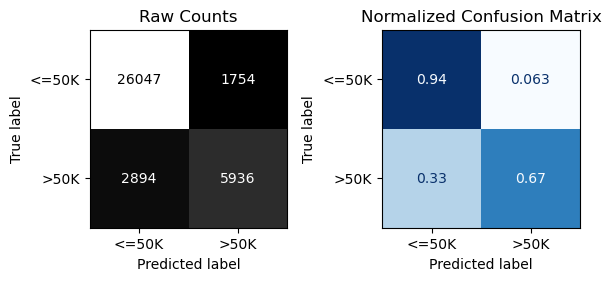


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89      9354
        >50K       0.64      0.58      0.61      2857

    accuracy                           0.83     12211
   macro avg       0.76      0.74      0.75     12211
weighted avg       0.82      0.83      0.82     12211



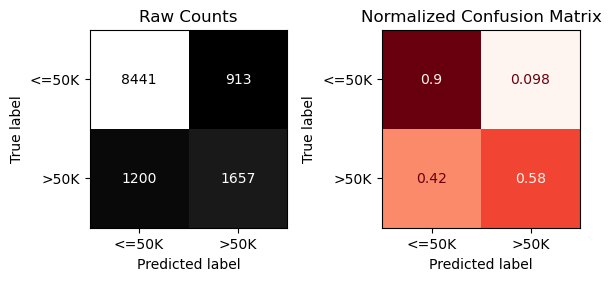

In [87]:
# Obtain evaluation metrics using custom function
evaluate_classification(knn_pipe, scaled_X_train, y_train, scaled_X_test, y_test)

In [88]:
from sklearn.inspection import permutation_importance
# Permutation importance takes a fit model and the test data.
r = permutation_importance(knn_pipe, scaled_X_test, y_test, n_repeats =5, random_state = 42)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [89]:
## can make the mean importances into a series
permutation_importances = pd.Series(r['importances_mean'],index=scaled_X_test.columns,
                           name = 'permutation importance')
permutation_importances = permutation_importances.sort_values(ascending=False)
permutation_importances

capital-gain                 0.009614
age                          0.005470
education_Bachelors          0.005356
education_Prof-school        0.004291
capital-loss                 0.004029
                               ...   
workclass_Private           -0.001015
workclass_Federal-gov       -0.001097
occupation_Prof-specialty   -0.001147
workclass_Local-gov         -0.001179
education_Assoc-voc         -0.001245
Name: permutation importance, Length: 108, dtype: float64

In [90]:
# Plot importance custom function
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax


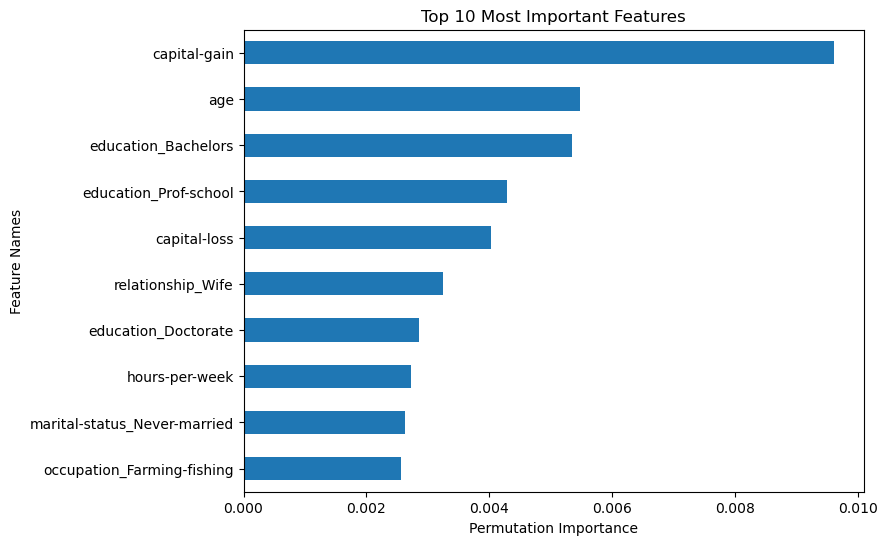

In [91]:
ax = plot_importance(permutation_importances,top_n=10)
ax.set(xlabel='Permutation Importance');

# Summary
- There are new contributing features to the scaled data set. These include: education_Bachelors, education_Prof-school, relationship_wife, education_Doctorate, marital-status_Never-married and occupation_Farming-fishing.
- These new features seem to emphasize the importance in correlation of education to income.
- Age still has a strong affect on income but not as large as the previous model.
- Capital-gain now has the largest effect on income status in the new data set. 